In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  

In [ ]:
train_url = 'http://hackathon.datacrunch.com/data/train_test_hackathon.pkl'
data = pd.read_pickle(train_url)

In [3]:
data.head()

,Feature_1_cv_enum,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14_cv_bool,Feature_15_cv_bool,Feature_16_cv_bool,Feature_17_cv_bool,Feature_18_adv_cv_bool,Feature_19_adv_cv_bool,Feature_20_adv_cv_bool,Feature_21_adv_cv_bool,Feature_22_adv_cv_bool,Feature_23_adv_cv_enum,target_r,target_g,target_b
82247,3.0,387.0,19527.0000,387,0.0000,387,38.699520,2734.620117,-0.189790,0.00,6.149803e+05,0.019819,0,1,0,0,0,0,0,0,0,1,4,1,0,1
143444,3.0,424.0,35489.4999,424,0.0000,424,NaN,NaN,NaN,0.00,4.167333e+06,0.011947,1,1,0,0,0,0,0,0,0,1,4,0,0,0
183844,3.0,253.0,243052.5175,253,0.0000,253,66.548996,2362.719971,0.129491,0.00,1.976974e+07,0.001041,1,1,0,0,0,0,0,0,0,1,4,0,0,0
156433,2.0,1526.0,111029.6685,1526,0.0000,1526,35.044918,2383.120117,0.205257,0.00,5.241259e+06,0.013744,1,0,1,0,0,1,0,0,1,0,0,0,0,0
44639,3.0,50.0,9380.2130,50,15.6942,50,NaN,NaN,NaN,784.71,1.330630e+05,0.005330,1,1,0,0,0,0,0,0,0,1,4,1,1,1


In [4]:
for c in data.columns:
    if ("enum" in c):
        dummies = pd.get_dummies(data[c], prefix=c)
        data.drop(columns=[c], inplace=True)
        data = pd.concat([dummies, data], axis=1)

for c in data.columns:
    data[c] = data[c].fillna(data[c].mean())
    data[c] = data[c].clip(
        data[c].quantile(0.01),
        data[c].quantile(0.99)
    )

In [5]:
data.head()

,Feature_23_adv_cv_enum_0,Feature_23_adv_cv_enum_1,Feature_23_adv_cv_enum_2,Feature_23_adv_cv_enum_3,Feature_23_adv_cv_enum_4,Feature_1_cv_enum_0.0,Feature_1_cv_enum_1.0,Feature_1_cv_enum_2.0,Feature_1_cv_enum_3.0,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14_cv_bool,Feature_15_cv_bool,Feature_16_cv_bool,Feature_17_cv_bool,Feature_18_adv_cv_bool,Feature_19_adv_cv_bool,Feature_20_adv_cv_bool,Feature_21_adv_cv_bool,Feature_22_adv_cv_bool,target_r,target_g,target_b
82247,0,0,0,0,1,0,0,0,1,387.0,19527.0000,387.0,0.0000,387,38.699520,2734.620117,-0.189790,0.00,6.149803e+05,0.019819,0,1,0,0,0,0,0,0,0,1,1,0,1
143444,0,0,0,0,1,0,0,0,1,424.0,35489.4999,424.0,0.0000,424,14907.318483,2519.349161,-0.020086,0.00,4.167333e+06,0.011947,1,1,0,0,0,0,0,0,0,1,0,0,0
183844,0,0,0,0,1,0,0,0,1,253.0,243052.5175,253.0,0.0000,253,66.548996,2362.719971,0.129491,0.00,1.976974e+07,0.001041,1,1,0,0,0,0,0,0,0,1,0,0,0
156433,1,0,0,0,0,0,0,1,0,1526.0,111029.6685,1526.0,0.0000,1526,35.044918,2383.120117,0.205257,0.00,5.241259e+06,0.013744,1,0,1,0,0,1,0,0,1,0,0,0,0
44639,0,0,0,0,1,0,0,0,1,50.0,9380.2130,50.0,15.6942,50,14907.318483,2519.349161,-0.020086,784.71,1.330630e+05,0.005330,1,1,0,0,0,0,0,0,0,1,1,1,1


<AxesSubplot:>

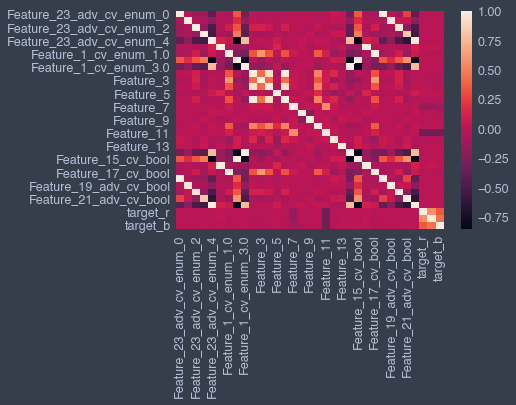

In [6]:
sns.heatmap(data.corr())

In [7]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=2)
features = data[['Feature_7', 'Feature_11', 'target_r', 'target_g', 'target_b']]
new_data = trans.fit_transform(features)
print(new_data.shape)

(300000, 21)


<AxesSubplot:>

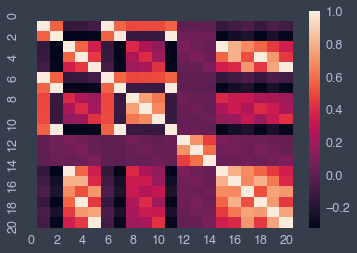

In [8]:
sns.heatmap(pd.DataFrame(new_data).corr())

<ipython-input-12-6d2f55b3f642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Feature_7_squared'] = x['Feature_7'] ** 2
<ipython-input-12-6d2f55b3f642>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Feature_11_squared'] = x['Feature_11'] ** 2
<ipython-input-12-6d2f55b3f642>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<AxesSubplot:>

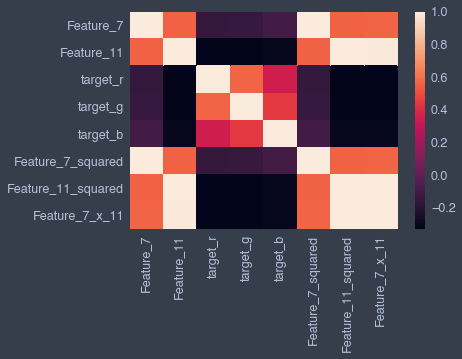

In [12]:
x = data[['Feature_7', 'Feature_11', 'target_r', 'target_g', 'target_b']]
x['Feature_7_squared'] = x['Feature_7'] ** 2
x['Feature_11_squared'] = x['Feature_11'] ** 2
x['Feature_7_x_11'] = x['Feature_7'] * x['Feature_11']
sns.heatmap(x.corr())

In [27]:
features = data.drop(columns=['target_r', 'target_g', 'target_b'])
features_poly = trans.fit_transform(features)
print(features_poly.shape)

(300000, 496)


In [28]:
targets = data[['target_r', 'target_g', 'target_b']]
print(targets.shape)

(300000, 3)


In [34]:
import catboost

cb = catboost.CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10)
cb.fit(features_poly, targets['target_r'])

0:	learn: 0.6576056	total: 1.42s	remaining: 23m 38s
1:	learn: 0.6343284	total: 2.47s	remaining: 20m 33s
2:	learn: 0.6187124	total: 3.54s	remaining: 19m 35s
3:	learn: 0.6096879	total: 4.55s	remaining: 18m 51s
4:	learn: 0.6043711	total: 5.64s	remaining: 18m 42s
5:	learn: 0.6008020	total: 6.64s	remaining: 18m 20s
6:	learn: 0.5993077	total: 7.64s	remaining: 18m 4s
7:	learn: 0.5979096	total: 8.63s	remaining: 17m 50s
8:	learn: 0.5964483	total: 9.68s	remaining: 17m 46s
9:	learn: 0.5947829	total: 10.6s	remaining: 17m 32s
10:	learn: 0.5941319	total: 11.7s	remaining: 17m 35s
11:	learn: 0.5934911	total: 13s	remaining: 17m 50s
12:	learn: 0.5925941	total: 14s	remaining: 17m 40s
13:	learn: 0.5917048	total: 15s	remaining: 17m 34s
14:	learn: 0.5910477	total: 15.9s	remaining: 17m 26s
15:	learn: 0.5897240	total: 16.9s	remaining: 17m 19s
16:	learn: 0.5891165	total: 17.9s	remaining: 17m 15s
17:	learn: 0.5884384	total: 18.9s	remaining: 17m 10s
18:	learn: 0.5880776	total: 19.8s	remaining: 17m 2s
19:	learn: 

153:	learn: 0.5404097	total: 2m 35s	remaining: 14m 16s
154:	learn: 0.5400802	total: 2m 36s	remaining: 14m 15s
155:	learn: 0.5397173	total: 2m 37s	remaining: 14m 14s
156:	learn: 0.5394256	total: 2m 38s	remaining: 14m 12s
157:	learn: 0.5391571	total: 2m 39s	remaining: 14m 11s
158:	learn: 0.5390257	total: 2m 40s	remaining: 14m 10s
159:	learn: 0.5387584	total: 2m 41s	remaining: 14m 8s
160:	learn: 0.5385249	total: 2m 42s	remaining: 14m 7s
161:	learn: 0.5380771	total: 2m 43s	remaining: 14m 6s
162:	learn: 0.5378746	total: 2m 44s	remaining: 14m 5s
163:	learn: 0.5375843	total: 2m 45s	remaining: 14m 4s
164:	learn: 0.5372352	total: 2m 46s	remaining: 14m 2s
165:	learn: 0.5367004	total: 2m 47s	remaining: 14m 1s
166:	learn: 0.5362682	total: 2m 48s	remaining: 14m
167:	learn: 0.5359713	total: 2m 49s	remaining: 13m 59s
168:	learn: 0.5355106	total: 2m 50s	remaining: 13m 58s
169:	learn: 0.5349770	total: 2m 51s	remaining: 13m 57s
170:	learn: 0.5346790	total: 2m 52s	remaining: 13m 56s
171:	learn: 0.5343631

304:	learn: 0.4964395	total: 5m 1s	remaining: 11m 27s
305:	learn: 0.4961122	total: 5m 2s	remaining: 11m 26s
306:	learn: 0.4958632	total: 5m 3s	remaining: 11m 25s
307:	learn: 0.4956704	total: 5m 4s	remaining: 11m 24s
308:	learn: 0.4955155	total: 5m 5s	remaining: 11m 23s
309:	learn: 0.4953385	total: 5m 6s	remaining: 11m 22s
310:	learn: 0.4949640	total: 5m 7s	remaining: 11m 21s
311:	learn: 0.4946879	total: 5m 9s	remaining: 11m 21s
312:	learn: 0.4944528	total: 5m 10s	remaining: 11m 20s
313:	learn: 0.4941180	total: 5m 11s	remaining: 11m 19s
314:	learn: 0.4939747	total: 5m 12s	remaining: 11m 19s
315:	learn: 0.4937345	total: 5m 13s	remaining: 11m 17s
316:	learn: 0.4934487	total: 5m 14s	remaining: 11m 16s
317:	learn: 0.4932458	total: 5m 15s	remaining: 11m 15s
318:	learn: 0.4930006	total: 5m 16s	remaining: 11m 14s
319:	learn: 0.4928276	total: 5m 17s	remaining: 11m 14s
320:	learn: 0.4925554	total: 5m 18s	remaining: 11m 12s
321:	learn: 0.4924060	total: 5m 19s	remaining: 11m 11s
322:	learn: 0.4922

456:	learn: 0.4625015	total: 7m 39s	remaining: 9m 5s
457:	learn: 0.4623410	total: 7m 40s	remaining: 9m 5s
458:	learn: 0.4622195	total: 7m 41s	remaining: 9m 4s
459:	learn: 0.4619677	total: 7m 42s	remaining: 9m 3s
460:	learn: 0.4617843	total: 7m 43s	remaining: 9m 2s
461:	learn: 0.4615280	total: 7m 45s	remaining: 9m 1s
462:	learn: 0.4613214	total: 7m 46s	remaining: 9m 1s
463:	learn: 0.4609676	total: 7m 48s	remaining: 9m
464:	learn: 0.4606469	total: 7m 49s	remaining: 9m
465:	learn: 0.4604838	total: 7m 51s	remaining: 8m 59s
466:	learn: 0.4602127	total: 7m 52s	remaining: 8m 59s
467:	learn: 0.4600234	total: 7m 53s	remaining: 8m 58s
468:	learn: 0.4598894	total: 7m 54s	remaining: 8m 57s
469:	learn: 0.4596589	total: 7m 56s	remaining: 8m 57s
470:	learn: 0.4595036	total: 7m 57s	remaining: 8m 56s
471:	learn: 0.4592816	total: 7m 58s	remaining: 8m 55s
472:	learn: 0.4589867	total: 7m 59s	remaining: 8m 54s
473:	learn: 0.4588738	total: 8m	remaining: 8m 53s
474:	learn: 0.4586962	total: 8m 1s	remaining: 8

609:	learn: 0.4356576	total: 10m 14s	remaining: 6m 33s
610:	learn: 0.4355030	total: 10m 15s	remaining: 6m 32s
611:	learn: 0.4353216	total: 10m 16s	remaining: 6m 31s
612:	learn: 0.4352373	total: 10m 17s	remaining: 6m 30s
613:	learn: 0.4350721	total: 10m 18s	remaining: 6m 29s
614:	learn: 0.4349713	total: 10m 19s	remaining: 6m 27s
615:	learn: 0.4347379	total: 10m 20s	remaining: 6m 26s
616:	learn: 0.4346090	total: 10m 21s	remaining: 6m 25s
617:	learn: 0.4344944	total: 10m 22s	remaining: 6m 24s
618:	learn: 0.4343456	total: 10m 23s	remaining: 6m 23s
619:	learn: 0.4342213	total: 10m 24s	remaining: 6m 22s
620:	learn: 0.4340886	total: 10m 25s	remaining: 6m 21s
621:	learn: 0.4339282	total: 10m 26s	remaining: 6m 20s
622:	learn: 0.4337555	total: 10m 27s	remaining: 6m 19s
623:	learn: 0.4336429	total: 10m 28s	remaining: 6m 18s
624:	learn: 0.4334206	total: 10m 29s	remaining: 6m 17s
625:	learn: 0.4333363	total: 10m 30s	remaining: 6m 16s
626:	learn: 0.4332225	total: 10m 31s	remaining: 6m 15s
627:	learn

760:	learn: 0.4107662	total: 12m 44s	remaining: 4m
761:	learn: 0.4105305	total: 12m 45s	remaining: 3m 59s
762:	learn: 0.4104023	total: 12m 46s	remaining: 3m 58s
763:	learn: 0.4102059	total: 12m 47s	remaining: 3m 57s
764:	learn: 0.4100775	total: 12m 48s	remaining: 3m 56s
765:	learn: 0.4099589	total: 12m 49s	remaining: 3m 55s
766:	learn: 0.4098138	total: 12m 50s	remaining: 3m 54s
767:	learn: 0.4096644	total: 12m 51s	remaining: 3m 53s
768:	learn: 0.4095007	total: 12m 52s	remaining: 3m 52s
769:	learn: 0.4093052	total: 12m 53s	remaining: 3m 51s
770:	learn: 0.4091699	total: 12m 54s	remaining: 3m 50s
771:	learn: 0.4090797	total: 12m 55s	remaining: 3m 49s
772:	learn: 0.4089772	total: 12m 56s	remaining: 3m 48s
773:	learn: 0.4088636	total: 12m 57s	remaining: 3m 47s
774:	learn: 0.4087536	total: 12m 58s	remaining: 3m 46s
775:	learn: 0.4085893	total: 12m 59s	remaining: 3m 45s
776:	learn: 0.4085051	total: 13m	remaining: 3m 44s
777:	learn: 0.4083215	total: 13m 1s	remaining: 3m 43s
778:	learn: 0.40824

911:	learn: 0.3898951	total: 15m 15s	remaining: 1m 28s
912:	learn: 0.3897490	total: 15m 16s	remaining: 1m 27s
913:	learn: 0.3895555	total: 15m 17s	remaining: 1m 26s
914:	learn: 0.3894164	total: 15m 18s	remaining: 1m 25s
915:	learn: 0.3893053	total: 15m 19s	remaining: 1m 24s
916:	learn: 0.3892483	total: 15m 20s	remaining: 1m 23s
917:	learn: 0.3891373	total: 15m 21s	remaining: 1m 22s
918:	learn: 0.3889113	total: 15m 22s	remaining: 1m 21s
919:	learn: 0.3888349	total: 15m 23s	remaining: 1m 20s
920:	learn: 0.3887299	total: 15m 24s	remaining: 1m 19s
921:	learn: 0.3885400	total: 15m 25s	remaining: 1m 18s
922:	learn: 0.3884589	total: 15m 26s	remaining: 1m 17s
923:	learn: 0.3882444	total: 15m 27s	remaining: 1m 16s
924:	learn: 0.3881513	total: 15m 28s	remaining: 1m 15s
925:	learn: 0.3879178	total: 15m 29s	remaining: 1m 14s
926:	learn: 0.3878186	total: 15m 30s	remaining: 1m 13s
927:	learn: 0.3876994	total: 15m 31s	remaining: 1m 12s
928:	learn: 0.3876203	total: 15m 32s	remaining: 1m 11s
929:	learn

In [18]:
from sklearn import metrics
def test_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    print(metrics.classification_report(y_pred, y_test))
    plt.hist(y_pred)
    plt.plot()

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    167001
           1       0.87      0.85      0.86    130999

    accuracy                           0.88    298000
   macro avg       0.88      0.88      0.88    298000
weighted avg       0.88      0.88      0.88    298000



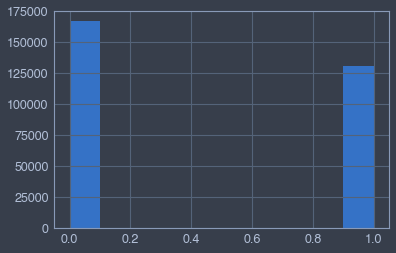

In [35]:
test_model(cb, features_poly[:-2000], targets[:-2000]['target_r'])